In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:\\Users\\Dell\\Desktop\\Omdena\\ml_assignment\\machine-learning-introduction-bnusuwal\\data\BostonHousing.csv")

<>:18: SyntaxWarning: invalid escape sequence '\B'
<>:18: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Dell\AppData\Local\Temp\ipykernel_31944\3534627838.py:18: SyntaxWarning: invalid escape sequence '\B'
  data = pd.read_csv("C:\\Users\\Dell\\Desktop\\Omdena\\ml_assignment\\machine-learning-introduction-bnusuwal\\data\BostonHousing.csv")


In [8]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (data < lower_bound) | (data > upper_bound)
print(outliers.sum())  # Count of outliers per column


# Remove rows with outliers
data_no_outliers = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]


print("Original data shape:", data.shape)
print("Data without outliers shape:", data_no_outliers.shape)


crim       66
zn         68
indus       0
chas       35
nox         0
rm         30
age         0
dis         5
rad         0
tax         0
ptratio    15
b          77
lstat       7
medv       40
dtype: int64
Original data shape: (506, 14)
Data without outliers shape: (268, 14)


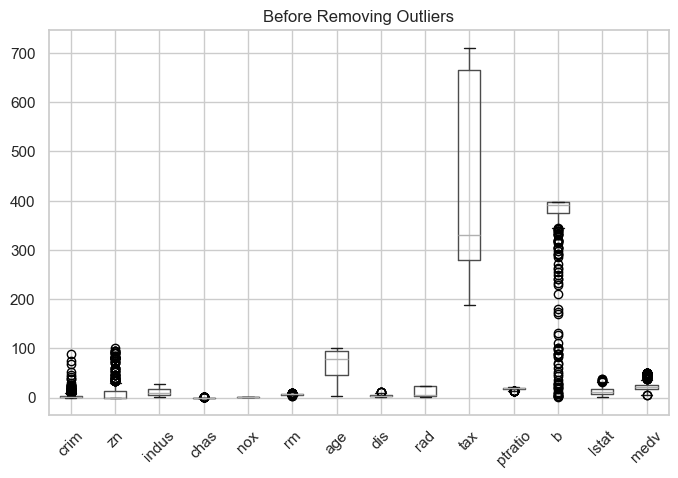

In [ ]:

plt.figure(figsize=(8, 5))
data.boxplot()
plt.title("Before Removing Outliers")
plt.xticks(rotation=45)
plt.show()


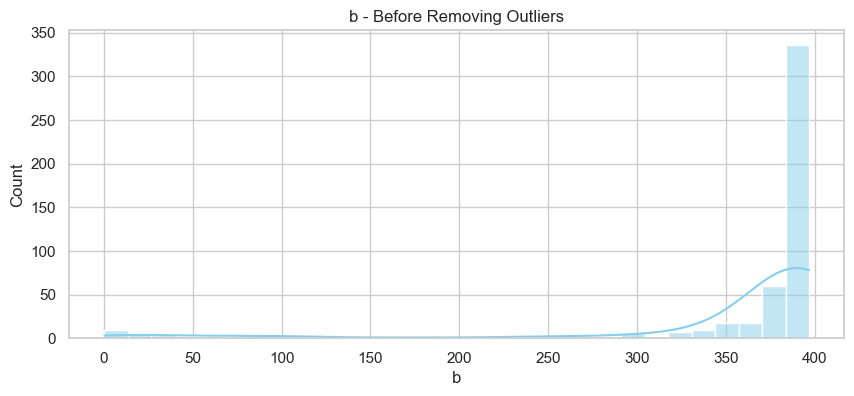

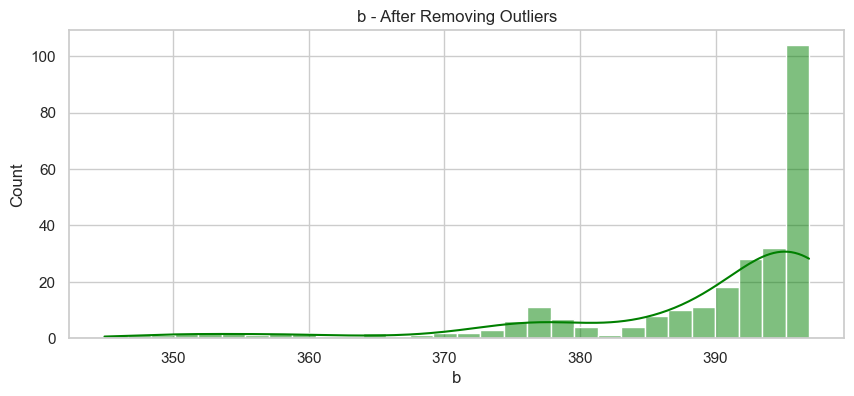

In [ ]:
#Visualization of a column outlier handling 

column = 'b'  # replace with a column you're interested in

# Histogram before
plt.figure(figsize=(10, 4))
sns.histplot(data[column], kde=True, bins=30, color='skyblue')
plt.title(f"{column} - Before Removing Outliers")
plt.show()

# Histogram after
plt.figure(figsize=(10, 4))
sns.histplot(data_no_outliers[column], kde=True, bins=30, color='green')
plt.title(f"{column} - After Removing Outliers")
plt.show()


In [ ]:

from sklearn.preprocessing import LabelEncoder

# Check for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Label Encoding for binary categorical features (if any)
for feature in categorical_cols:
    if data[feature].nunique() == 2:  # For binary categorical features like 'chas'
        label_encoder = LabelEncoder()
        data[feature] = label_encoder.fit_transform(data[feature])

# One-Hot Encoding for nominal categorical features (if any)
data_encoded = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the encoded dataset
print(data_encoded.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
#Standardization (Z-score scaling): scales features to have mean = 0 and standard deviation = 1.

from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
data_standardized = data.copy()
data_standardized[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print(data_standardized.head())


       crim        zn     indus      chas       nox        rm       age  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        dis       rad       tax   ptratio         b     lstat      medv  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [23]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop('medv', axis=1)  
y = data['medv']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (404, 13)
Testing set shape: (102, 13)
